<a href="https://colab.research.google.com/github/rafacapu/DataScience_projects/blob/main/Classificador_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
!wget http://weegee.vision.ucmerced.edu/datasets/UCMerced_LandUse.zip

--2023-04-11 15:12:08--  http://weegee.vision.ucmerced.edu/datasets/UCMerced_LandUse.zip
Resolving weegee.vision.ucmerced.edu (weegee.vision.ucmerced.edu)... 169.236.184.65
Connecting to weegee.vision.ucmerced.edu (weegee.vision.ucmerced.edu)|169.236.184.65|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 332468434 (317M) [application/zip]
Saving to: ‘UCMerced_LandUse.zip.2’

UCMerced_LandUse.zi   0%[                    ] 789.69K   205KB/s    eta 30m 53s^C


In [6]:
!unzip UCMerced_LandUse.zip

Archive:  UCMerced_LandUse.zip
replace UCMerced_LandUse/Images/agricultural/agricultural00.tif? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: UCMerced_LandUse/Images/agricultural/agricultural00.tif  
replace UCMerced_LandUse/Images/agricultural/agricultural01.tif? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: UCMerced_LandUse/Images/agricultural/agricultural01.tif  
replace UCMerced_LandUse/Images/agricultural/agricultural02.tif? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: UCMerced_LandUse/Images/agricultural/agricultural02.tif  
replace UCMerced_LandUse/Images/agricultural/agricultural03.tif? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace UCMerced_LandUse/Images/agricultural/agricultural03.tif? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: UCMerced_LandUse/Images/agricultural/agricultural03.tif  
replace UCMerced_LandUse/Images/agricultural/agricultural04.tif? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: UCMerced

In [8]:
train_dir = 'UCMerced_LandUse/Images'
test_dir = 'UCMerced_LandUse/Images'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)


In [9]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')


Found 2100 images belonging to 21 classes.
Found 2100 images belonging to 21 classes.


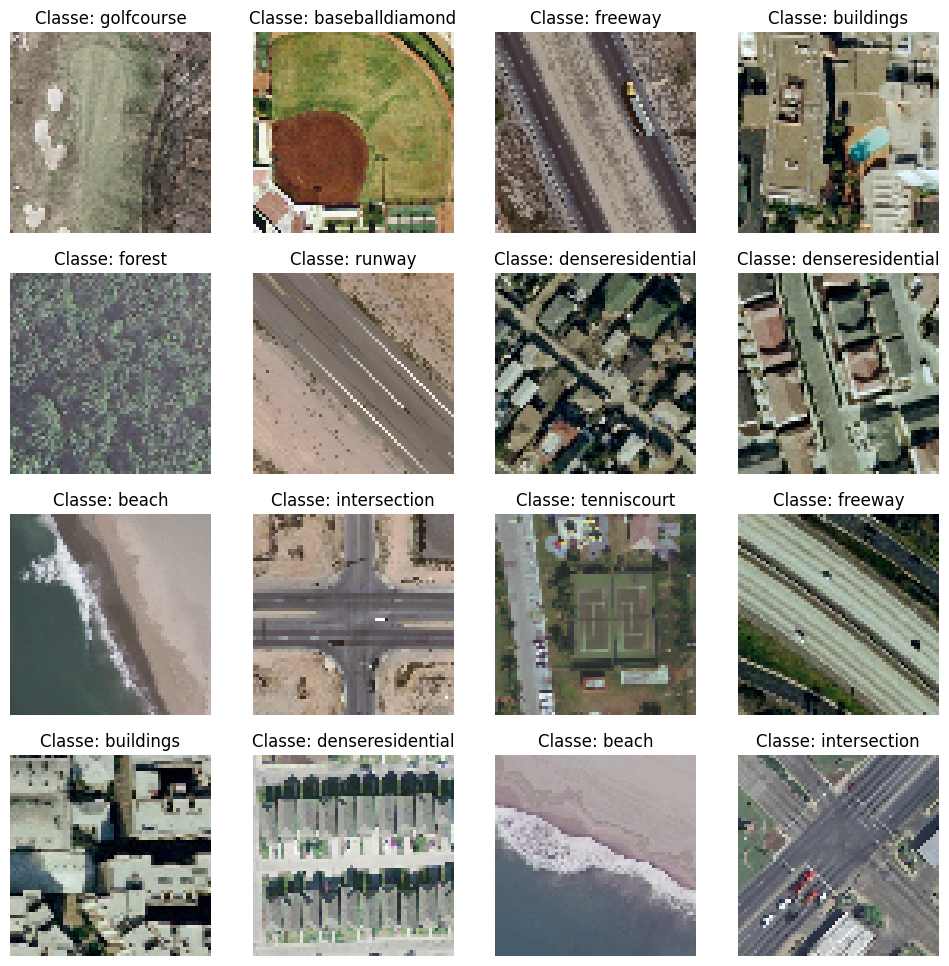

In [19]:
import matplotlib.pyplot as plt
x_batch, y_batch = test_generator.next()
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12,12))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_batch[i])
    ax.set_title(f"Classe: {list(train_generator.class_indices.keys())[np.argmax(y_batch[i])]}")
    ax.axis('off')



In [13]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(21, activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)       

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=20,
                    validation_data=test_generator,
                    validation_steps=len(test_generator))




Epoch 1/20
66/66 [==============================] - 29s 420ms/step - loss: 2.9403 - accuracy: 0.0933 - val_loss: 2.7880 - val_accuracy: 0.1476
Epoch 2/20
66/66 [==============================] - 32s 481ms/step - loss: 2.3492 - accuracy: 0.2567 - val_loss: 2.3506 - val_accuracy: 0.2800
Epoch 3/20
66/66 [==============================] - 42s 639ms/step - loss: 2.0656 - accuracy: 0.3243 - val_loss: 2.4099 - val_accuracy: 0.2924
Epoch 4/20
66/66 [==============================] - 27s 412ms/step - loss: 1.8236 - accuracy: 0.4005 - val_loss: 1.6517 - val_accuracy: 0.4438
Epoch 5/20
66/66 [==============================] - 28s 421ms/step - loss: 1.6062 - accuracy: 0.4743 - val_loss: 2.0983 - val_accuracy: 0.4010
Epoch 6/20
66/66 [==============================] - 30s 448ms/step - loss: 1.3642 - accuracy: 0.5571 - val_loss: 1.2381 - val_accuracy: 0.6186
Epoch 7/20
66/66 [==============================] - 29s 429ms/step - loss: 1.1818 - accuracy: 0.6157 - val_loss: 1.0154 - val_accuracy: 0.6705

In [16]:
import numpy as np

y_pred = model.predict_generator(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

from sklearn.metrics import classification_report, confusion_matrix

print('Matriz de confusão:')
print(confusion_matrix(y_true, y_pred_classes))

print('\nRelatório de classificação:')
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices))


<ipython-input-16-e9d1ef613e0b>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_generator)


Matriz de confusão:
[[ 4 10  3  7  6  4  7  1  6  3  4  5  1  6  5  8  4  4  4  3  5]
 [ 7  8  4  4 10  3  8  3  1  4  5  5  2  4 10  5  3  2  2  4  6]
 [ 3  8  8  5  7  5  7  3  6  2  2  5  2  6  3 10  4  6  1  2  5]
 [ 2  8  3  2  9  9  5  3 11  2  5  6  1  1  4  6  6  4  5  1  7]
 [ 3 10  7  6  7  1  5  6  4  3  3  7  1  5  4  6  3  5  3  5  6]
 [ 8  5  2  3  6  4  4  6  6  2 10  6  1  5  8  3  6  5  2  2  6]
 [ 7  7  3  1 14  7  5  5  6  3  2  2  2  7  1  4  5  6  5  0  8]
 [ 5 11  3  4 10  7  8  4  4  2  5  3  3  5  2  8  5  5  0  1  5]
 [ 7 11  6  3  3  5  5  4  5  2  1  5  3  5  6  3  8  5  4  3  6]
 [ 5  9  3  4  6  5  4  5  7  3  6  6  0  5  7  6  3  8  0  5  3]
 [ 4 10  4  4  9  3  7  5  3  2  6  6  0  9  5  7  1  3  3  5  4]
 [ 6  8  4  7  5  6  6  4  6  3  7  4  4  3  2  5  5  5  4  3  3]
 [ 3  7  6  7  9  8  2  2  1  1  6  1  1  8  4 11 10  8  2  1  2]
 [ 3  5  4  8  8  8  8  3  5  2  5  3  0  3  4  6  3  5  3  5  9]
 [ 4  8  5  4  9  6  3  5  6  1  6  3  3  6  5  5  4  4 

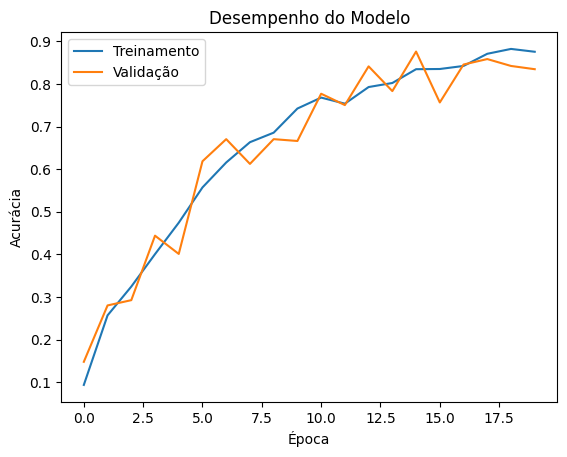

In [20]:
import matplotlib.pyplot as plt

# Plotar gráfico de desempenho do modelo
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Desempenho do Modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Treinamento', 'Validação'], loc='upper left')
plt.show()
